# Avaliação 1

Essa avaliação consiste em uma analise do data set: “Iris Flower Data Set”

Alunos: Guilherme Prazeres Matos de Souza e Joaquim joca da Silva

## Questão 1

In [21]:
# Blibliotecas necessarias e dependencias

import matplotlib.pyplot as plt
import pandas as pd

# Load CSV file into a pandas DataFrame
iris = pd.read_csv('iris.csv')

### a.

O data set apresenta atributos **Multivariados** <br>
onde tem **4 Atributos preditivos e  1 Atributo Alvo**

### b.

A classe é simbólica com escala **nominal**, pois ela representa com um nome a flor, já os outros 4 atributos, são numéricos, com escala **racional**, já que se tratam de medidas de dimensão, avaliados em centimetro como unidade.

### c.

Os dados ja estão balanceados como mostrado no grafico:

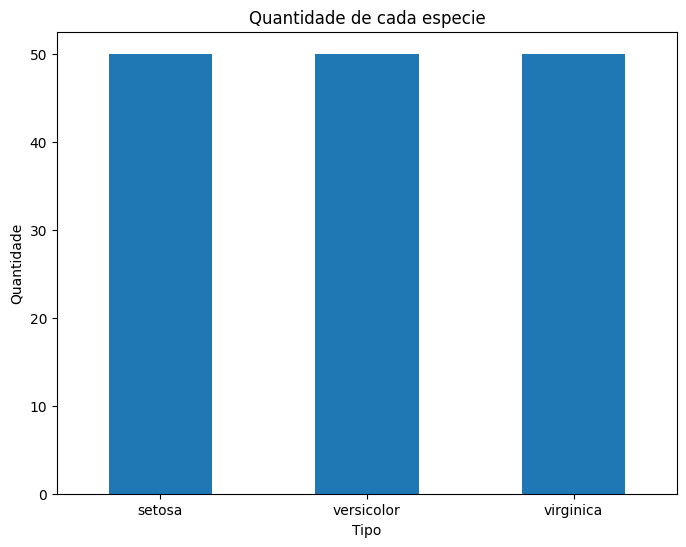

In [25]:
# Count how many types are in the data set
type_counts = iris['species'].value_counts()

# Plotting
type_counts.plot(kind='bar', figsize=(8, 6))
plt.title('Quantidade de cada especie')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.show()

Aqui podemos ver a média de cada especie de flor

In [22]:
def media(df, attribute, species):
    df_specie = df[df['species'] == species]
    
    if len(df_specie) == 0:
        return "Sem dados para a especie selecionada"
    
    sum_values = 0
    for value in df_specie[attribute]:
        sum_values += value
        
    result = sum_values / len(df_specie)
    return result

print(media(iris,'sepal_length', 'setosa'))

5.005999999999999


Calculando a mediana para cada atributo preditivo

In [24]:
def mediana(df, atribute, species):

    if len(df) == 0:
        return "Sem dados para a especie selecionada"    

    # Sort the dataset to be ascending
    df_sorted = df.sort_values(by=atribute, ascending=True) 
    
    # Sort rows that match the flower_type selected
    df_specie = df_sorted[df_sorted['species'] == species] 
    
    # Calculates the median
    if len(df_specie)% 2 == 0:
        result = (df_specie[atribute].iloc[len(df_specie) // 2] + df_specie[atribute].iloc[len(df_specie)// 2 + 1]) / 2 
        return result
    else:
        result = df_specie[atribute].iloc[len(df_specie) // 2]
        return result
    
print(mediana(iris,'sepal_length', 'setosa'))
print(mediana(iris,'sepal_width', 'versicolor'))
print(mediana(iris,'petal_length', 'setosa'))
print(mediana(iris,'petal_width', 'setosa'))


5.0
2.8
1.5
0.2


### f.

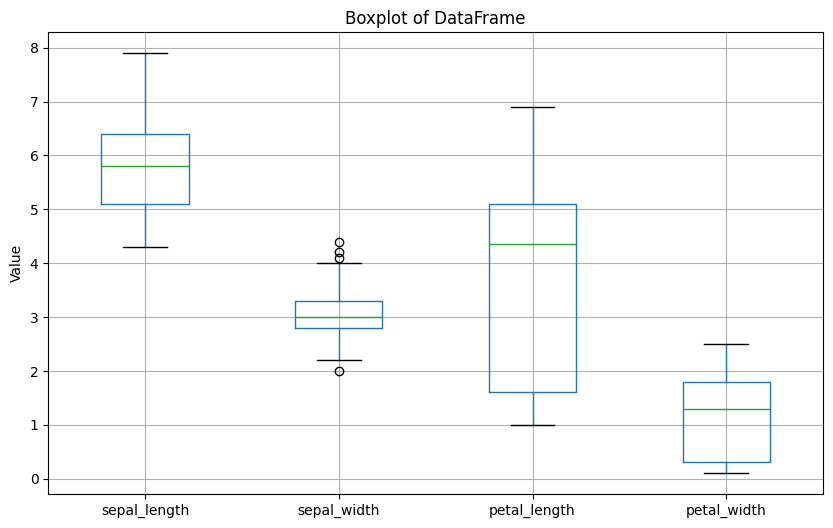

In [26]:
iris.boxplot(figsize=(10, 6))
plt.title('Boxplot of DataFrame')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()